In [7]:
import pandas as pd
import numpy as np 
import requests
import matplotlib.pyplot as plt

In [8]:

url = 'http://bit.ly/w-data'
df = pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


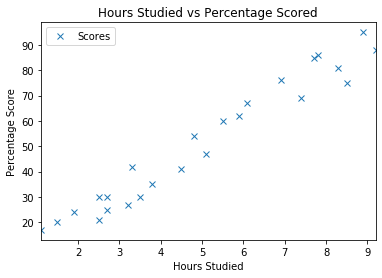

In [9]:
df.plot(x='Hours', y='Scores', style='x')  
plt.title('Hours Studied vs Percentage Scored')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()
    

In [10]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values 

In [25]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                            test_size=0.25, random_state=0) 

In [26]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, Y_train) 



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

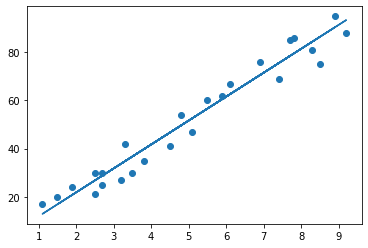

In [27]:
plot = reg.coef_*X+reg.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, plot);
plt.show()

In [28]:
yhat = reg.predict(X_test)
yhat

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [29]:
columns = ['Actual','Predicted']
Comp = pd.DataFrame(columns=columns)
Comp['Actual'] = Y_test
Comp['Predicted'] = yhat
Comp

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


In [30]:
# Now, lets predict percentage for 9.25 no. of hours
hr = [9.25]
print('The percentage for studying 9.25 hrs are {}'.format(reg.predict([hr])))

The percentage for studying 9.25 hrs are [93.89272889]


In [31]:
from sklearn import metrics
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, yhat))  
print('Mean Squared Error:', 
      metrics.mean_squared_error(Y_test, yhat))  
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(Y_test, yhat)))

Mean Absolute Error: 4.130879918502486
Mean Squared Error: 20.33292367497997
Root Mean Squared Error: 4.5092043283688055


array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])